In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import io,color,measure,feature
from sklearn import cluster,datasets
from scipy import signal
from fcmeans import FCM
import skfuzzy as fuzz

In [5]:
img = io.imread('S1_obiecte.png')
print(np.shape(img))

(256, 256, 3)


In [6]:
Y = np.uint8(255*color.rgb2gray(img))

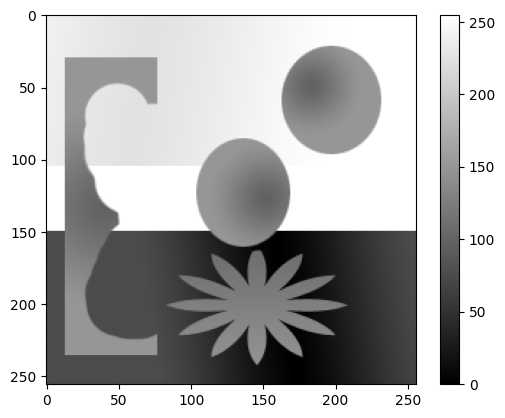

(<Figure size 640x480 with 2 Axes>,
 None)

In [7]:
plt.figure(),plt.imshow(img,cmap="gray"),plt.colorbar(),plt.show()

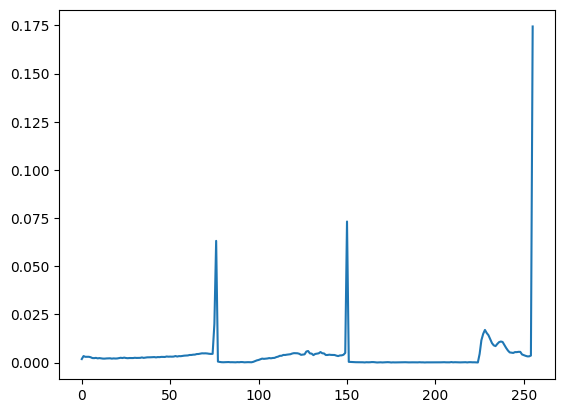

(<Figure size 640x480 with 1 Axes>,
 None)

In [8]:
h,_=np.histogram(img,bins=256,range=(0,256),density=True)
plt.figure(), plt.plot(h),plt.show()

In [33]:
def segmentare(img,low,high): #pragurile nivelurilor de gri pentru obiect
    [h,w] = img.shape
    Y = np.zeros([h,w],dtype = np.uint8)
    for i in range(h):
        for j in range(w):
            if img[i,j] >= low and img[i,j] <= high:
                Y[i,j] = 1
            else:
                Y[i,j] = 0
    return Y

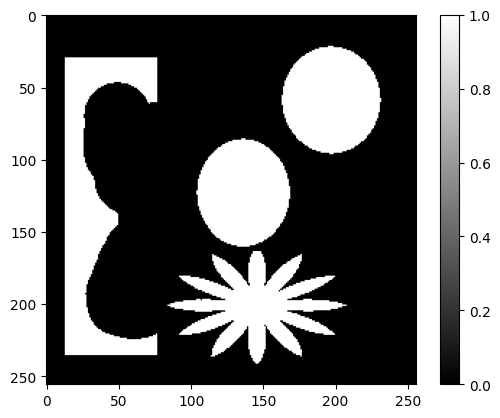

(<Figure size 640x480 with 2 Axes>,
 None)

In [34]:
img_seg = segmentare(Y,95,155)
plt.figure(),plt.imshow(img_seg,cmap="gray"),plt.colorbar(),plt.show()

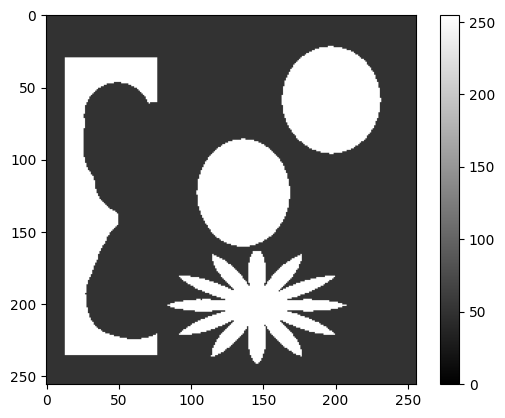

(<Figure size 640x480 with 2 Axes>,
 None)

In [49]:
[h,w] = np.shape(img_seg)
img_nou = np.zeros([h,w])
for i in range(0,h):
    for j in range(0,w):
        if(img_seg[i,j]==1):
            img_nou[i,j] = 255
        else:
            img_nou[i,j] = 50
plt.figure(),plt.imshow(img_nou,cmap="gray",vmin=0,vmax=255),plt.colorbar(),plt.show()

In [50]:
def add_gaussian_noise(img,disp,L):
    # parametrii : imaginea originala, dispersia zgomotului
    h,w = img.shape
    noise = np.random.normal(0,disp,(h,w))
    img_noise = np.zeros([h,w])
    img_noise = img + noise
    for i in range(0, h):
        for j in range(0, w):
            if (img_noise[i,j]>L-1):
                img_noise[i,j]=L-1
            else:
                if (img_noise[i,j]<0):
                    img_noise[i,j]=0
    img_noise = np.uint8(img_noise)
    # intoarce imaginea cu zgomot
    return img_noise

In [51]:
imgZg = add_gaussian_noise(img_nou,15,256)

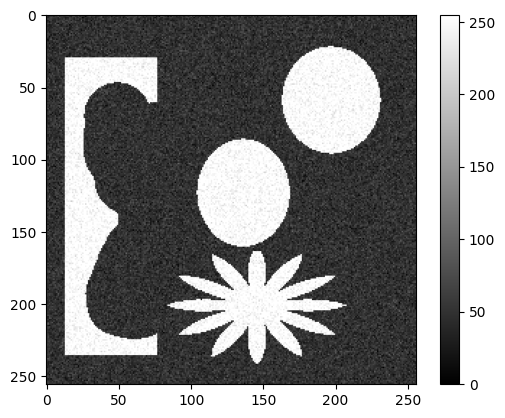

(<Figure size 640x480 with 2 Axes>,
 None)

In [52]:
plt.figure(),plt.imshow(imgZg,cmap="gray",vmin=0,vmax=255),plt.colorbar(),plt.show()

In [53]:
def Riddler(hist,T):
    L = 256
    eps = 0.0000001 #previne impartirea la zero
    Tcalc = 0
    while Tcalc!= T:
        p0=s0=0
        T = Tcalc
        for i in range(0,T):
            p0 += i*hist[i]
            s0 += hist[i]
        mu0 = p0/(s0+eps)
        p1 = s1 = 0
        for i in range(T,256):
            p1 += i*hist[i]
            s1 += hist[i]
        mu1 = p1/(s1+eps)
        Tcalc = np.uint8((mu1+mu0)/2)
    return np.uint8(Tcalc)

In [54]:
h,_=np.histogram(imgZg,bins=256,range=(0,256),density=True)
RID = Riddler(h,75)
print(RID)

149


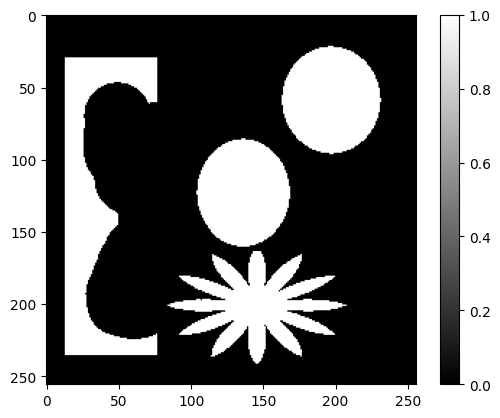

(<Figure size 640x480 with 2 Axes>,
 None)

In [55]:
imgZg = (imgZg>RID)
plt.figure(),plt.imshow(imgZg,cmap="gray"),plt.colorbar(),plt.show()

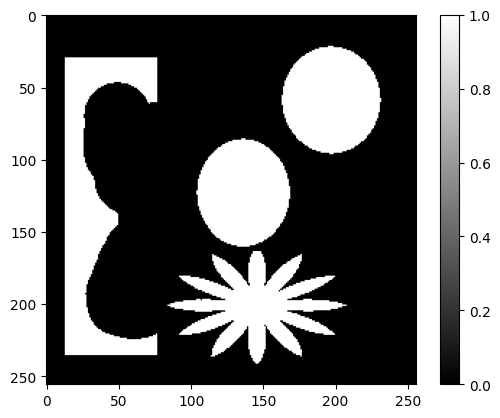

(<Figure size 640x480 with 2 Axes>,
 None)

In [47]:
plt.figure(),plt.imshow(img_seg,cmap="gray"),plt.colorbar(),plt.show()

In [57]:
TP=imgZg*img_seg

In [60]:
print(np.sum(TP)/(256*256))

0.26739501953125


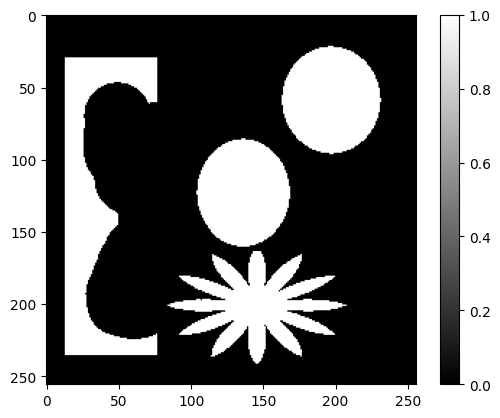

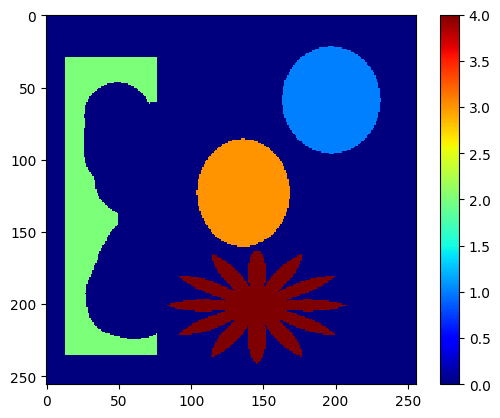

(<Figure size 640x480 with 2 Axes>,
 None)

In [62]:
plt.figure(),plt.imshow(imgZg,cmap="gray"),plt.colorbar(),plt.show()
BW = imgZg
[LabelImage, nums]=measure.label(BW,return_num='True')
plt.figure(),plt.imshow(LabelImage,cmap="jet",interpolation='none'),plt.colorbar(),plt.show()

In [79]:
ALLPROPS=measure.regionprops(LabelImage)
centers_dist = np.zeros([nums])
for i in range(nums):
    centers_dist[i] = np.sqrt(np.abs(ALLPROPS[i].centroid[0]-128)**2+np.abs(ALLPROPS[i].centroid[1]-128)**2)
img_auto = (LabelImage==(np.argmin(centers_dist)+1))

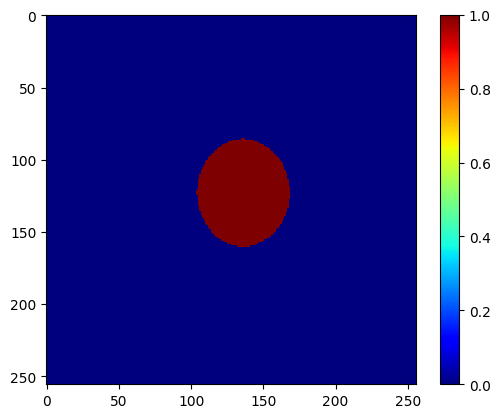

(<Figure size 640x480 with 2 Axes>,
 None)

In [80]:
plt.figure(),plt.imshow(img_auto,cmap="jet",interpolation='none'),plt.colorbar(),plt.show()

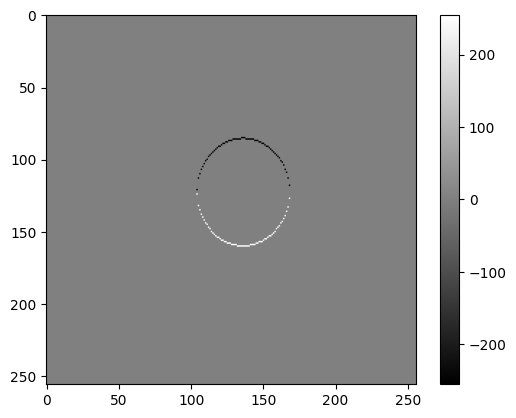

(<Figure size 640x480 with 2 Axes>,
 None)

In [86]:
[h,w] = np.shape(img_auto)
YY = np.zeros([h+1,w+1])
for l in range(0,h):
    for c in range(0,w):
        if img_auto[l,c] == True:
            YY[l,c] = 255
        else:
            YY[l,c] = 0
        
fx=np.zeros([h, w])
for l in range(0,h):
    for c in range(0,w):
        fx[l,c]=YY[l,c]-YY[l+1,c]
plt.figure(),plt.imshow(fx,cmap='gray'),plt.colorbar(),plt.show()

In [110]:
L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri
def texture_features_GCM(img):
    result = feature.graycomatrix(img, [2], [0,  np.pi/4,  np.pi/2], levels=int(L/d))
    fc = feature.graycoprops(result, prop = 'contrast')
    #feat = np.concatenate((fc,fd,fh,fa,fe,fcc), axis = 1)
    return fc

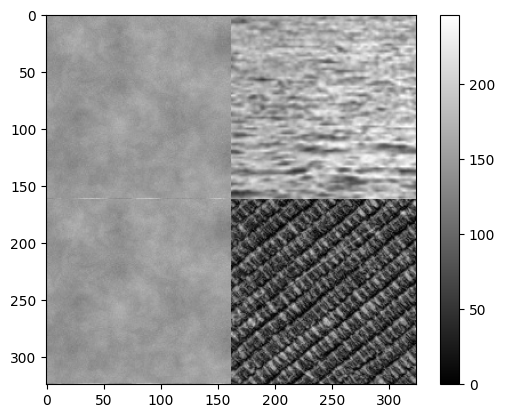

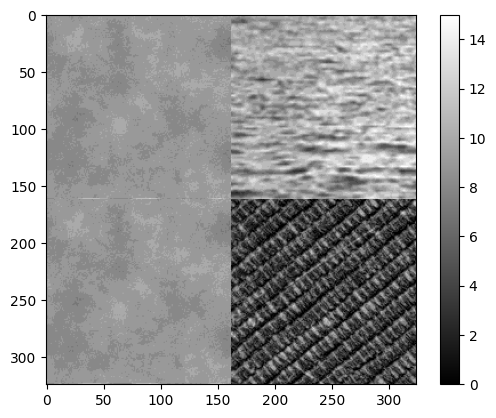

(11449, 3)


In [111]:
image = io.imread('textura1.jpg')
dims = np.shape(image)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# impart imaginea in blocuri (suprapuse 0%) de size_patch x size_patch
size_patch = 3
step = int(size_patch)#/2) pentru suprapunere 50%
nr_patch = int(dims[0]/step - 1)  

features1 = np.zeros([nr_patch*nr_patch,3])

index = 0
for i in range(nr_patch):
    for j in range(nr_patch):     
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
        features1[index, :] = texture_features_GCM(img)
        index +=  1
print(np.shape(features1))

C:\Users\flori\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


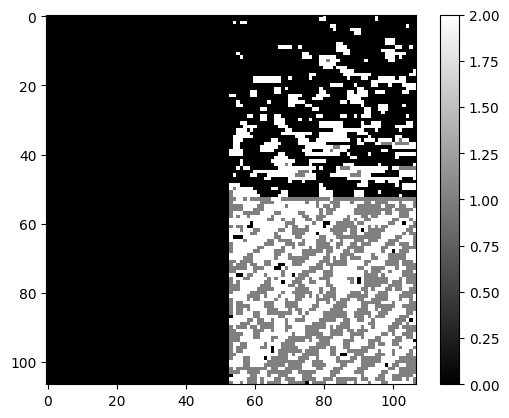

(<Figure size 640x480 with 2 Axes>,
 None)

In [112]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.colorbar(),plt.show()